In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
for i in range(torch.cuda.device_count()):
  print(i, torch.cuda.get_device_name(i))

0 Tesla T4


In [ ]:
import os
folders = os.listdir('/content/drive/MyDrive/Dataset/')

In [ ]:
for f in folders:
  path = '/content/drive/MyDrive/Dataset/' + f

  print(f+" "+str(len(os.listdir(path))))

cats 181
horses 181
dogs 181
humans 181


In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [ ]:
sapmple_image = '/content/drive/MyDrive/Dataset/dogs/dog.1.jpg'
img = image.load_img(sapmple_image)
print(type(img))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [ ]:
img = image.img_to_array(img)/255.0
print(img.shape)

(499, 327, 3)


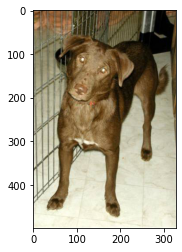

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
import keras
import keras.layers as layers
from keras.models import Sequential

In [ ]:
input_shape = (150, 150, 3)
num_classes = 4
model = keras.Sequential(
    [
     keras.Input(shape = input_shape),
     layers.Conv2D(32, kernel_size=(3,3), activation = "relu"),
     layers.MaxPooling2D(pool_size = (2, 2)),
     layers.Conv2D(64, kernel_size=(3,3), activation = "relu"),
     layers.MaxPooling2D(pool_size = (2, 2)),
     layers.Conv2D(128, kernel_size=(3,3), activation = "relu"),
     layers.MaxPooling2D(pool_size = (2, 2)),
     layers.Flatten(),
     layers.Dropout(0.3),
     layers.Dense(num_classes, activation="softmax")
    ]
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
train_gen = ImageDataGenerator(rescale = 1.0/255,
                               rotation_range = 40,
                               width_shift_range = 0.2,
                               height_shift_range=0.2,
                               shear_range = 0.2,
                               zoom_range = 0.3,
                               horizontal_flip = True
                               )



val_gen = ImageDataGenerator(rescale = 1.0/255)

train_generator = train_gen.flow_from_directory(
    '/content/drive/MyDrive/Dataset',
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical'
)

val_generator = val_gen.flow_from_directory(
    '/content/drive/MyDrive/Val_dataset',
    target_size = (150, 150),
    batch_size = 21,
    class_mode = 'categorical'
)

Found 724 images belonging to 4 classes.
Found 84 images belonging to 4 classes.


In [ ]:
for x, y in train_generator:
  x, y = train_generator.next()
  print(x.shape, y.shape)
  break

(32, 150, 150, 3) (32, 4)


In [ ]:
for x, y in val_generator:
  x, y = val_generator.next()
  print(x.shape, y.shape)
  break

(21, 150, 150, 3) (21, 4)


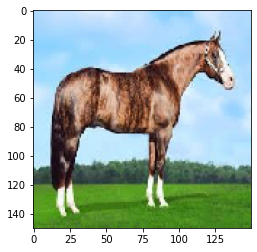

In [ ]:
plt.imshow(x[15])
plt.show()

In [ ]:
y[2]

array([0., 0., 0., 1.], dtype=float32)

In [ ]:
history = model.fit_generator(
    train_generator, 
    epochs = 50,
    steps_per_epoch = 7,
    validation_data = val_generator, 
    validation_steps = 4
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
7/7 [==============================] - 8s 401ms/step - loss: 1.4874 - accuracy: 0.2545 - val_loss: 1.4230 - val_accuracy: 0.3095
Epoch 2/50
7/7 [==============================] - 2s 305ms/step - loss: 1.3745 - accuracy: 0.4062 - val_loss: 1.3390 - val_accuracy: 0.2857
Epoch 3/50
7/7 [==============================] - 4s 519ms/step - loss: 1.3403 - accuracy: 0.3304 - val_loss: 1.2716 - val_accuracy: 0.4524
Epoch 4/50
7/7 [==============================] - 2s 313ms/step - loss: 1.2119 - accuracy: 0.4777 - val_loss: 1.1072 - val_accuracy: 0.5833
Epoch 5/50
7/7 [==============================] - 3s 351ms/step - loss: 1.1260 - accuracy: 0.5142 - val_loss: 1.2039 - val_accuracy: 0.5119
Epoch 6/50
7/7 [==============================] - 2s 267ms/step - loss: 1.1275 - accuracy: 0.5045 - val_loss: 1.1031 - val_accuracy: 0.4405
Epoch 7/50
7/7 [==============================] - 2s 208ms/step - loss: 1.0783 - accuracy: 0.5446 - val_loss: 1.0122 - val_accuracy: 0.5595
Epoch 8/50
7/7 [====

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

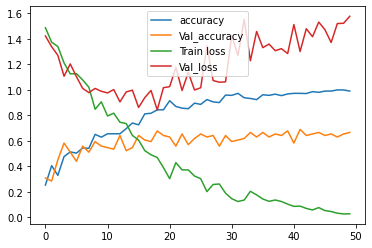

In [ ]:
plt.plot(acc, label = "accuracy")
plt.plot(val_acc, label = "Val_accuracy")
plt.plot(loss, label = "Train loss")
plt.plot(val_loss, label = "Val_loss")
plt.legend()
plt.show()